### Importing libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
plt.style.use('ggplot')

### Data Analysis

In [11]:
train_data = pd.read_csv('data/traindata.csv')

##### Understanding the dataset

In [12]:
train_data.head(1)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_data.shape

(42000, 785)

We have 42000 samples x 784 pixel columns

##### Extracting data



In [26]:
train_labels = train_data.iloc[:,0].values               #Converting data to Numpy arrays
train_images = train_data.iloc[:,1:].values

train_images.shape

(42000, 784)

Visualizing a training example

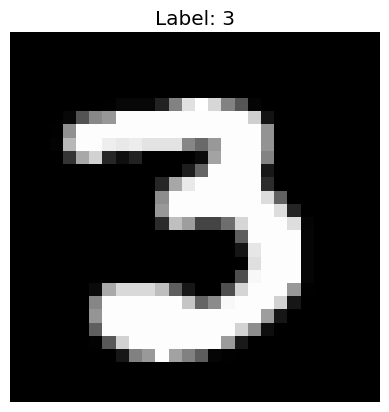

In [27]:
random_no1 = random.randint(0,42000)

image = train_images[random_no1].reshape(28, 28)

#Plotting it
plt.imshow(image, cmap='gray')
plt.title(f"Label: {labels[random_no1]}")
plt.axis('off')
plt.show()

Extracting testing data for future use

In [24]:
test_data = pd.read_csv('data/traindata.csv')

In [ ]:
test_labels = test_data.iloc[:,0].values
test_images = test_data.iloc[:,1:].values

### Data normalization

Since the values only range from 0-255 and we rely on relu activation function for this project, the most optimal value of normalization is by division of highest value

In [28]:
train_images = train_images/255
test_images = test_images/255

### Architecture of the Neural Network

For this project, the chosen architecture involves

Input layer --> Hidden layer (128 units, relu) --> Hidden layer (64 units, relu) --> Output layer (10 units, linear)

Hence, we initialize the weight and biases for this architecture accordingly

In [29]:
W1 = np.random.randn(784, 128) * 0.01   #Keeping values small for regularization 
W2 = np.random.randn(128, 64) * 0.01
W3 = np.random.randn(64, 10)  * 0.01


In [30]:
b1 = np.zeros(128)
b2 = np.zeros(64)
b3 = np.zeros(10)
